In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import networkx as nx

In [81]:
senti_scores = pd.read_csv('Assignment 3 Sentiment Scores.csv')
edmunds_posts = pd.read_csv('Assignment 3 Edmunds Posts.csv')
edmunds_list = list(edmunds_posts['Posts'])

In [82]:
senti_scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [83]:
SentiStrength_scores = pd.read_csv("SentiStrength_Dict.csv")
del SentiStrength_scores['Unnamed: 2']
SentiStrength_scores['word'].apply(lemmatize)
senti_dict = SentiStrength_scores.set_index('word')['score'].to_dict()

In [84]:
senti_dict

{'dissolution': -2,
 'desirable': 4,
 'chaos': -2,
 'obstruction': -2,
 'protest': -2,
 'thirst': -2,
 'hating': -4,
 'hate': -4,
 'accus': -2,
 'vile': -4,
 'spew': -2,
 'scold': -2,
 'unsteadiness': -2,
 'daze': -2,
 'sputter': -2,
 'immature': -2,
 'pride': 2,
 'whack': -2,
 'lure': -2,
 'risk': -2,
 'compassion': 2,
 'dispense': -2,
 'void': -2,
 'lurk': -1,
 'distort': -2,
 'smack': -2,
 'disobedient': -2,
 'senil': -2,
 'disturb': -2,
 'prize': 3,
 'pinch': -2,
 'graced': 2,
 'paranoi': -3,
 'brutish': -2,
 'desperat': -3,
 'deplorable': -2,
 'graces': 2,
 'triumph': 3,
 'enjoy': 3,
 'force': -2,
 'monotonous': -2,
 'popularis': 1,
 'tired': -2,
 'populariz': 1,
 'crave': -2,
 'horr': -4,
 'rigorous': 1,
 'sternly': -2,
 'emptiness': -3,
 'decadence': -2,
 'wreck': -2,
 'ruthless': -3,
 'amus': 2,
 'beaten': -1,
 'litig': -2,
 'hazy': -2,
 'mischievous': -2,
 'sunder': -2,
 'blur': -2,
 'neat': 1,
 'admiral': 1,
 'hero': 3,
 'avert': -2,
 'tyranous': -3,
 'sobs': -4,
 'unfeeling'

In [85]:
def SentiRate(tokens_list):
    '''Takes list of tokens and returns a cumulative sentiment score for the
    entire list'''
    sentence_score = 0
    for token in tokens_list:
        if token in senti_dict.keys():
            token_score = senti_dict[token]
            sentence_score += token_score
    return sentence_score

In [86]:
senti_scores.columns.values

array(['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ',
       'Sclass'], dtype=object)

In [87]:
tokenizer = RegexpTokenizer("[\w]+")
lemmatize = WordNetLemmatizer().lemmatize
stop_words= stopwords.words('english')

In [90]:
# Make list of models
models = list(senti_scores.columns.values)

# Initialize dictionary
edmunds_dict = {}
for item in models:
    edmunds_dict[item] = []
for key in edmunds_dict:
    edmunds_dict[key] = [0]*len(edmunds_posts)

In [91]:
i = 0
for review in edmunds_list:
    sentences = []
    for sent in re.split(r'[.]+', review):
        sentences.append(sent)
    for sentence in sentences:
        tokens = [token.lower() for token in tokenizer.tokenize(sentence)]
        tokens = [lemmatize(token) for token in tokens]
        for model in models:
            if model.lower() in tokens:
                sentence_score = SentiRate(tokens)
                edmunds_dict[model][i] += sentence_score
    i += 1

In [92]:
edmunds_scores = pd.DataFrame(edmunds_dict)
edmunds_scores.head(10)

,3series,5series,7series,A6,A8,ES,LS,RX,Sclass,XJ
0,0,0,0,0,-1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,2,0,0
4,-4,0,0,0,0,0,0,-4,-2,0
5,0,0,0,0,0,0,0,0,2,0
6,0,0,0,0,0,0,0,0,3,0
7,0,0,0,0,4,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,2,0


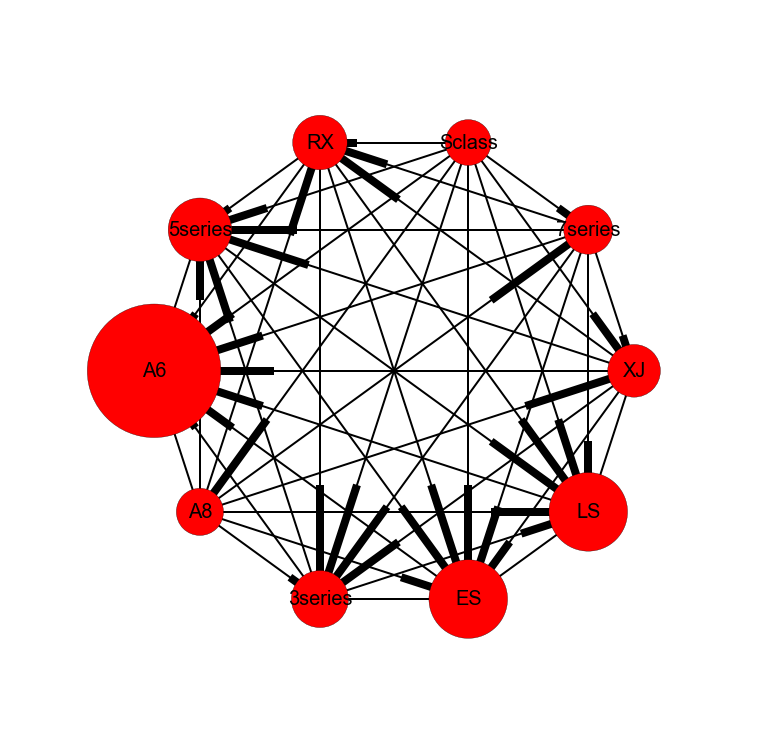

In [93]:
nodes = list(edmunds_scores.columns.values)
col = edmunds_scores.columns
ar = []
for i in range(len(col)-1):
    for j in range(len(col)):
        if j>i:
            pos = edmunds_scores[[col[i],col[j]]][(edmunds_scores[col[i]]>
                                                   edmunds_scores[col[j]])]
            neg = edmunds_scores[[col[i],col[j]]][edmunds_scores[col[i]]<
                                                  edmunds_scores[col[j]]]
            posv = (pos[col[i]]-pos[col[j]]).sum()
            negv = (neg[col[j]]-neg[col[i]]).sum()
            sen = posv-negv
            ar.append((col[i],col[j],sen))
            
ar2=[]
for i in ar:
    if i[2]<0:
        ar2.append((i[1],i[0],-i[2]))
    else:
        ar2.append(i)
        
DG=nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_weighted_edges_from(ar2)

pr = nx.pagerank(DG, alpha=0.9)

page_rank_arr = []
page_rank_arr2 = []
for i in col:
    page_rank_arr.append((i,pr[i]*50000))
    page_rank_arr2.append(pr[i]*50000)
    
DG=nx.DiGraph()
DG.add_nodes_from(nodes,node_size=page_rank_arr)
DG.add_weighted_edges_from(ar2)

col2 = []
for i in col:
    col2.append(i)
    
plt.figure(figsize=(10,10))
nx.draw_circular(DG,nodelist=col2, font_size=20, width=2,
               node_size=page_rank_arr2,with_labels=True)

In [94]:
for key, value in sorted(pr.iteritems(), key=lambda (k,v): (v,k)):
    print "%s: %s" % (key, value)

Sclass: 0.0421298716323
A8: 0.0445266407888
7series: 0.048188411991
XJ: 0.0555901869666
RX: 0.0594795030548
3series: 0.0651312972486
5series: 0.0806431218874
ES: 0.123657476162
LS: 0.123657476162
A6: 0.356996014106


In [95]:
CarSales = {'A6': 20000, 'A8':12000, '3-Series':220000, '5-Series': 60000, 
            '7-Series':14000,'XJ': 6600, 'ES':135000, 'LS':30000, 'RX': 120000, 'S-Class':25000}

carPRscore = dict(pr)

keys = list(carPRscore.viewkeys() | CarSales.viewkeys())
y=0
while (y < 11):
    print keys[y]," : ", np.corrcoef([carPRscore.get(x, y) for x in keys], [CarSales.get(x, y) for x in keys])[0,1]
    y+=1

XJ  :  -0.129773867302
S-Class  :  0.337186213042
7series  :  0.337088712014
3-Series  :  0.336402394202
Sclass  :  0.335952468297
RX  :  0.33565002652
7-Series  :  0.335435051526
5series  :  0.335274896164
A6  :  0.335151062111
A8  :  0.335052438877
3series  :  0.334971993249
